In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

train = pd.read_csv('data/train.csv', index_col=None)

In [10]:
forest = ExtraTreesClassifier()

forest.fit(train.iloc[:,1:], train['Class'])

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
            axis = 0)
indices = np.argsort(importances)[::-1]

print('Feature ranking:')
for f in range(train.iloc[:,1:].shape[1]):
    print('%d. feature %d (%f)' % (f+1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 5 (0.030824)
2. feature 697 (0.014117)
3. feature 357 (0.013385)
4. feature 180 (0.012048)
5. feature 1 (0.011177)
6. feature 387 (0.010661)
7. feature 808 (0.009496)
8. feature 611 (0.009043)
9. feature 126 (0.008742)
10. feature 897 (0.008302)
11. feature 807 (0.007710)
12. feature 606 (0.007659)
13. feature 926 (0.007306)
14. feature 233 (0.007123)
15. feature 936 (0.006647)
16. feature 919 (0.006305)
17. feature 87 (0.006218)
18. feature 139 (0.006137)
19. feature 175 (0.006101)
20. feature 967 (0.006042)
21. feature 284 (0.005710)
22. feature 730 (0.005458)
23. feature 128 (0.005438)
24. feature 23 (0.005415)
25. feature 469 (0.005368)
26. feature 130 (0.005334)
27. feature 125 (0.005237)
28. feature 656 (0.005237)
29. feature 590 (0.004677)
30. feature 573 (0.004584)
31. feature 935 (0.004563)
32. feature 824 (0.004488)
33. feature 33 (0.004472)
34. feature 341 (0.004430)
35. feature 872 (0.004406)
36. feature 1019 (0.004401)
37. feature 140 (0.004381)

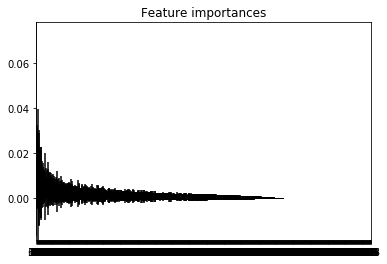

In [85]:
plt.figure()
plt.title('Feature importances')
plt.bar(range(train.iloc[:,1:].shape[1]), importances[indices],
       color='r', yerr=std[indices], align='center')
plt.xticks(range(train.iloc[:,1:].shape[1]),indices)
plt.xlim([-1, train.iloc[:,1:].shape[1]])
plt.autoscale(tight=True)
plt.show()